# Ejercicios Graphs, Paths & Components

Ejercicios básicos de Grafos.

In [29]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Ejercicio - Número de Nodos y Enlaces

_ (resuelva en código propio y usando la librería NetworkX (python) o iGraph (R)) _

Cuente el número de nodos y enlaces con los siguientes links (asumiendo que el grafo puede ser dirigido Y no dirigido): 

In [2]:
edges = set([(1, 2), (2, 1), (3, 1), (3, 2), (2, 4), (4, 2)])
print(edges)

{(1, 2), (3, 2), (3, 1), (2, 1), (4, 2), (2, 4)}


In [3]:
#codigo sin usar la libreria
nodes = set()

for x,y in edges:
    nodes.add(x)
    nodes.add(y)

edges_not_directed = set()
for s in nodes:
    for t in nodes:
        if ((s,t) in edges or (t,s) in edges) and ((s,t) not in edges_not_directed and (t,s) not in edges_not_directed):
            edges_not_directed.add((s,t))
            
print('Grafo no dirigido:')
print('number of nodes: ', len(nodes))
print('number of edges: ', len(edges_not_directed))
print('')
print('Grafo dirigido:')
print('number of nodes: ', len(nodes))
print('number of edges: ', len(edges))

Grafo no dirigido:
number of nodes:  4
number of edges:  4

Grafo dirigido:
number of nodes:  4
number of edges:  6


Grafo no dirigido:
number of nodes:  4
number of edges:  4

Grafo dirigido:
number of nodes:  4
number of edges:  6


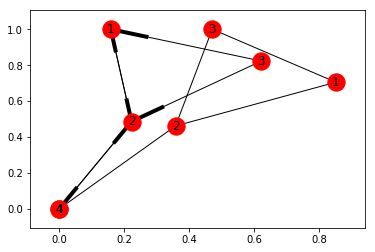

In [12]:
#Codigo usando la libreria
print('Grafo no dirigido:')
G=nx.Graph()
G.add_edges_from(edges)
number_nodes = G.number_of_nodes()
number_edges = G.number_of_edges()
print('number of nodes: ', number_nodes)
print('number of edges: ', number_edges)
nx.draw_networkx(G)
print('')
print('Grafo dirigido:')
DG=nx.DiGraph()
DG.add_edges_from(edges)
number_nodes = DG.number_of_nodes()
number_edges = DG.number_of_edges()
print('number of nodes: ', number_nodes)
print('number of edges: ', number_edges)
nx.draw_networkx(DG)

## Ejercicio - Matriz de Adyacencia

_ (resuelva en código propio y usando la librería NetworkX (python) o iGraph (R)) _

Cree la matriz de adyacencia del grafo del ejercicio anterior (para dirigido y no-dirigido)

In [43]:
#codigo sin la liberia
print("Ejercicio con codigo propio")

adjacency_matrix_g = [[0 for j in range(len(nodes))] for i in range(len(nodes))]
for i in range(len(adjacency_matrix_g)):
    for j in range(len(adjacency_matrix_g[i])):
        if (i+1,j+1) in edges:
            adjacency_matrix_g[i][j] = 1
            adjacency_matrix_g[j][i] = 1

adjacency_matrix_dg = [[0 for j in range(len(nodes))] for i in range(len(nodes))]
for i in range(len(adjacency_matrix_dg)):
    for j in range(len(adjacency_matrix_dg[i])):
        if (i+1,j+1) in edges:
            adjacency_matrix_dg[i][j] = 1

print("Grafo no dirigido:")
print(adjacency_matrix_g)
print(" ")
print("Grafo dirigido:")
print(adjacency_matrix_dg)
print(" ")

#codigo utilizando la libreria
print("Ejercicio con libreria ")
AG = nx.adjacency_matrix(G)
ADG = nx.adjacency_matrix(DG)
print("Grafo no dirigido:")
print(AG.todense())
print(" ")
print("Grafo dirigido:")
print(ADG.todense())

Ejercicio con codigo propio
Grafo no dirigido:
[[0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 0]]
 
Grafo dirigido:
[[0, 1, 0, 0], [1, 0, 0, 1], [1, 1, 0, 0], [0, 1, 0, 0]]
 
Ejercicio con libreria 
Grafo no dirigido:
[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 0]]
 
Grafo dirigido:
[[0 1 0 0]
 [1 0 0 1]
 [1 1 0 0]
 [0 1 0 0]]


## Ejercicio - Sparseness

Calcule la proporción entre número de links existentes en 3 redes reales (http://snap.stanford.edu/data/index.html) contra el número de links posibles.

In [49]:
def get_sparseness(number_nodes, number_edges, network_name):
    print(network_name, "sparseness:",(number_edges)/(number_nodes*number_nodes))

#Para la red ego-Twitter
nodes_ego_twitter = 81306
edges_ego_twitter = 1768149
get_sparseness(nodes_ego_twitter, edges_ego_twitter, "ego-Twitter")

#Para la red cit-HepPh
nodes_cit_hepph = 34546
edges_cit_hepph = 421578
get_sparseness(nodes_cit_hepph,edges_cit_hepph,"cit-HepPh")

#Para la red web-Google
nodes_web_google = 875713
edges_web_google = 5105039
get_sparseness(nodes_web_google,edges_web_google,"web-Google")

ego-Twitter sparseness: 0.00026746913206003207
cit-HepPh sparseness: 0.00035325018813313786
web-Google sparseness: 6.656952689754093e-06


En la matriz de adyacencia de cada uno de las redes elegidas, cuantos ceros hay?

In [50]:
def get_zeros(number_nodes, number_edges, network_name):
    print(network_name, "zeros:", (number_nodes*number_nodes) - number_edges)
    
get_zeros(nodes_ego_twitter, edges_ego_twitter, "ego-Twitter")
get_zeros(nodes_cit_hepph,edges_cit_hepph,"cit-HepPh")
get_zeros(nodes_web_google,edges_web_google,"web-Google")

ego-Twitter zeros: 6608897487
cit-HepPh zeros: 1193004538
web-Google zeros: 766868153330


## Ejercicio - Redes Bipartitas

Defina una red bipartita y genere ambas proyecciones, explique qué son los nodos y links tanto de la red original como de las proyeccciones

In [29]:
print("Ejercicio con codigo propio")
print()
bipartite_edges = set([(1, 'A'), (2, 'A'), (2, 'B'), (3, 'A'), (4, 'C'), (5, 'B'), (5, 'C'), (5, 'D'), (6, 'D'), (7, 'D')])
print("Red bipartita:",bipartite_edges)

nodes_0 = set()
nodes_1 = set()

for x,y in bipartite_edges:
    nodes_0.add(x)
    nodes_1.add(y)
    
print("Nodos proyeccion 0:",nodes_0)
print("Nodos proyeccion 1:",nodes_1)

projection_0 = set()
projection_1 = set()

for y in nodes_1:
    possible_nodes = set()
    for edge in bipartite_edges:
        if y in edge:
            possible_nodes.add(edge[0])
    for node1 in possible_nodes:
        for node2 in possible_nodes:
            if (node1,node2) not in projection_0 and (node2,node1) not in projection_0:
                projection_0.add((node1,node2)) if (node1 != node2) else 0
print("Proyeccion 0:",sorted(projection_0))

for x in nodes_0:
    possible_nodes = set()
    for edge in bipartite_edges:
        if x in edge:
            possible_nodes.add(edge[1])
    for node1 in possible_nodes:
        for node2 in possible_nodes:
            if (node1,node2) not in projection_1 and (node2,node1) not in projection_1:
                projection_1.add((node1,node2)) if (node1 != node2) else 0
                
print("Proyeccion 1:",sorted(projection_1))

print()
print("Ejercicio con libreria ")
print()

bipatite_graph = nx.Graph()
bipatite_graph.add_nodes_from(nodes_0, bipartite=0)
bipatite_graph.add_nodes_from(nodes_1, bipartite=1)
bipatite_graph.add_edges_from(bipartite_edges)

projected_graph_0 = bipartite.projected_graph(bipatite_graph, nodes_0)
projected_graph_1 = bipartite.projected_graph(bipatite_graph, nodes_1)
print("Proyeccion 0:",[sorted((u,v)) for u,v in projected_graph_0.edges()])
print("Proyeccion 1:",[sorted((u,v)) for u,v in projected_graph_1.edges()])

Ejercicio con codigo propio

Red bipartita: {(5, 'B'), (5, 'D'), (2, 'B'), (2, 'A'), (6, 'D'), (3, 'A'), (4, 'C'), (7, 'D'), (1, 'A'), (5, 'C')}
Nodos proyeccion 0: {1, 2, 3, 4, 5, 6, 7}
Nodos proyeccion 1: {'B', 'D', 'C', 'A'}
Proyeccion 0: [(1, 2), (1, 3), (2, 3), (2, 5), (4, 5), (5, 6), (5, 7), (6, 7)]
Proyeccion 1: [('B', 'A'), ('B', 'C'), ('B', 'D'), ('D', 'C')]

Ejercicio con libreria 

Proyeccion 0: [[1, 2], [1, 3], [2, 3], [2, 5], [4, 5], [5, 6], [5, 7], [6, 7]]
Proyeccion 1: [['B', 'D'], ['B', 'C'], ['A', 'B'], ['C', 'D']]


In [27]:
print("Ejercicio con codigo propio")
print()
bipartite_edges = set([(1, 'A',1), (2, 'A',5), (1, 'E',1), (2, 'E',5), (2, 'B',2), (3, 'A',2), (4, 'C',5), (5, 'B',6), (5, 'C',5), (5, 'D',2), (6, 'D',2), (7, 'D',2)])
print("Red bipartita:",sorted(bipartite_edges, key=lambda x: x[1]))

nodes_0 = set()
nodes_1 = set()

for x,y,w in bipartite_edges:
    nodes_0.add(x)
    nodes_1.add(y)
    
print("Nodos proyeccion 0:",nodes_0)
print("Nodos proyeccion 1:",nodes_1)

print()
print("Ejercicio con libreria ")
print()

def my_weight(G, u, v, weight='weight'):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        w += G.edge[u][nbr].get(weight, 1) + G.edge[v][nbr].get(weight, 1)
    return w

def jaccard(G, u, v):
    unbrs = set(G[u])
    vnbrs = set(G[v])
    return float(len(unbrs & vnbrs)) / len(unbrs | vnbrs)

bipatite_graph = nx.Graph()
bipatite_graph.add_nodes_from(nodes_0, bipartite=0)
bipatite_graph.add_nodes_from(nodes_1, bipartite=1)
bipatite_graph.add_weighted_edges_from(bipartite_edges)

projected_graph_0 = bipartite.generic_weighted_projected_graph(bipatite_graph, nodes_0, weight_function=my_weight)
projected_graph_1 = bipartite.generic_weighted_projected_graph(bipatite_graph, nodes_1, weight_function=my_weight)
print("Proyeccion 0:",projected_graph_0.edges(data=True))
print()
print("Proyeccion 1:",projected_graph_1.edges(data=True))

Ejercicio con codigo propio

Red bipartita: [(3, 'A', 2), (1, 'A', 1), (2, 'A', 5), (5, 'B', 6), (2, 'B', 2), (5, 'C', 5), (4, 'C', 5), (7, 'D', 2), (6, 'D', 2), (5, 'D', 2), (1, 'E', 1), (2, 'E', 5)]
Nodos proyeccion 0: {1, 2, 3, 4, 5, 6, 7}
Nodos proyeccion 1: {'C', 'E', 'D', 'B', 'A'}

Ejercicio con libreria 

Proyeccion 0: [(1, 2, {'weight': 12}), (1, 3, {'weight': 3}), (2, 3, {'weight': 7}), (2, 5, {'weight': 8}), (4, 5, {'weight': 10}), (5, 6, {'weight': 4}), (5, 7, {'weight': 4}), (6, 7, {'weight': 4})]

Proyeccion 1: [('C', 'D', {'weight': 7}), ('C', 'B', {'weight': 11}), ('E', 'B', {'weight': 7}), ('E', 'A', {'weight': 12}), ('D', 'B', {'weight': 8}), ('B', 'A', {'weight': 7})]


## Ejercicio - Paths

Cree un grafo de 5 nodos con 5 enlaces. Elija dos nodos cualquiera e imprima:
+ 5 Paths diferentes entre los nodos
+ El camino mas corto entre los nodos
+ El diámetro de la red
+ Un self-avoiding path


In [56]:
edges = set([(1, 2), (2, 3), (2, 5), (3, 4), (5, 4)])
print("Edges:", sorted(edges))

nodes = set()
for x,y in edges:
    nodes.add(x)
    nodes.add(y)
print("Nodes:", nodes)

paths_set = []
node_aux = ()
for x1,y1 in edges:
    node_aux = y1
    path_aux = set()
    path_aux.add((x1,y1))
    for x2,y2 in edges:
        if(node_aux == x2):
            path_aux.add((x2,y2))
            node_aux = y2
    paths_set.append(sorted(path_aux))
print(sorted(paths_set))

Edges: [(1, 2), (2, 3), (2, 5), (3, 4), (5, 4)]
Nodes: {1, 2, 3, 4, 5}
[[(1, 2), (2, 5)], [(2, 3), (3, 4)], [(2, 5), (5, 4)], [(3, 4)], [(5, 4)]]


# Ejercicio - Componentes

Baje una red real (http://snap.stanford.edu/data/index.html) y lea el archivo 

Utilizando NetworkX o iGraph descubra el número de componentes

Implemente el algorithmo Breadth First para encontrar el número de componentes (revise que el resultado es el mismo que utilizando la librería)

## Ejercicio - Degree distribution

_ (resuelva en código propio y usando la librería NetworkX (python) o iGraph (R)) _

Haga un plot con la distribución de grados de la red real

Calcule el grado promedio

## Ejercicio - Diámetro

In [7]:
N = 5

Cree un grafo de N nodos con el máximo diámetro posible

Cree un grafo de N nodos con el mínimo diámetro posible

Cree un grafo de N nodos que sea un ciclo simple

## Ejercicio - Pregunta "real"

Una aerolínea tiene las siguientes rutas desde las ciudades a las que sirve (cada par tiene servicio en ambas direcciones).

In [8]:
routemap =  [('St. Louis', 'Miami'), 
             ('St. Louis', 'San Diego'), 
             ('St. Louis', 'Chicago'), 
             ('San Diego', 'Chicago'), 
             ('San Diego', 'San Francisco'), 
             ('San Diego', 'Minneapolis'), 
             ('San Diego', 'Boston'), 
             ('San Diego', 'Portland'), 
             ('San Diego', 'Seattle'), 
             ('Tulsa', 'New York'), 
             ('Tulsa', 'Dallas'), 
             ('Phoenix', 'Cleveland'), 
             ('Phoenix', 'Denver'), 
             ('Phoenix', 'Dallas'), 
             ('Chicago', 'New York'), 
             ('Chicago', 'Los Angeles'), 
             ('Miami', 'New York'), 
             ('Miami', 'Philadelphia'), 
             ('Miami', 'Denver'), 
             ('Boston', 'Atlanta'), 
             ('Dallas', 'Cleveland'), 
             ('Dallas', 'Albuquerque'), 
             ('Philadelphia', 'Atlanta'), 
             ('Denver', 'Minneapolis'), 
             ('Denver', 'Cleveland'), 
             ('Albuquerque', 'Atlanta'), 
             ('Minneapolis', 'Portland'), 
             ('Los Angeles', 'Seattle'), 
             ('San Francisco', 'Portland'), 
             ('San Francisco', 'Seattle'), 
             ('San Francisco', 'Cleveland'), 
             ('Seattle', 'Portland')]

Cuál es el máximo número de intercambios que tendría que hacer un pasajero en un solo viaje entre dos ciudades servidas? (suponiendo rutas óptimas)

Si usted necesitara viajar mucho en esta aerolínea, cual sería el lugar óptimo para vivir? (i.e. minimizar el número de intercambios para llegar a cualquier ciudad) 

Visualize la red